<a href="https://colab.research.google.com/github/KunalRoutray/Deep-Learning/blob/main/image_classification_with_transfer_learning(ass_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kunal rouray

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, ResNet50, VGG16, MobileNetV2, Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [13]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [14]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0


In [15]:
# Split into training and validation
val_split = 0.2
val_size = int(len(x_train) * val_split)
x_val, y_val = x_train[:val_size], y_train[:val_size]
x_train, y_train = x_train[val_size:], y_train[val_size:]


In [16]:
# Define a function to create models
def create_model(base_model):
    base_model.trainable = False  # Freeze the base model layers
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Resizing(224, 224)(inputs)  # Resize for pre-trained models
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model


In [21]:
# List of models
models = {
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False),
    "ResNet50": ResNet50(weights='imagenet', include_top=False),
    "VGG16": VGG16(weights='imagenet', include_top=False),
    "MobileNetV2": MobileNetV2(weights='imagenet', include_top=False),
    "Xception": Xception(weights='imagenet', include_top=False)
}

/tmp/ipython-input-21-902286001.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV2": MobileNetV2(weights='imagenet', include_top=False),


In [18]:
trained_models = {}
history_dict = {}

important information use number of epochs atleast 10 for better learning

In [23]:
# Training parameters
epochs = 2  # Increased the number of epochs for better learning atlest do with 10
batch_size = 32
learning_rate = 1e-4  # Added a learning rate
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)] # Added restore_best_weights

# Train each model
for name, base in models.items():
    print(f"Training {name}...")
    model = create_model(base)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy']) # Added learning_rate
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    trained_models[name] = model
    history_dict[name] = history

Training InceptionV3...
Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 98ms/step - accuracy: 0.6976 - loss: 0.9256 - val_accuracy: 0.8215 - val_loss: 0.5263
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 111s 76ms/step - accuracy: 0.8340 - loss: 0.4913 - val_accuracy: 0.8241 - val_loss: 0.5075
Training ResNet50...
Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 156s 117ms/step - accuracy: 0.1116 - loss: 2.3218 - val_accuracy: 0.1031 - val_loss: 2.2788
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 182s 103ms/step - accuracy: 0.1562 - loss: 2.2678 - val_accuracy: 0.1359 - val_loss: 2.2386
Training VGG16...
Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 327s 250ms/step - accuracy: 0.2733 - loss: 2.1557 - val_accuracy: 0.4212 - val_loss: 1.8039
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 344s 230ms/step - accuracy: 0.4315 - loss: 1.7431 - val_accuracy: 0.4760 - val_loss: 1.6100
Training MobileNetV2...
Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 42ms/step - accuracy: 0.6379 - loss: 1.0697 - val_accuracy: 0.7795 - val

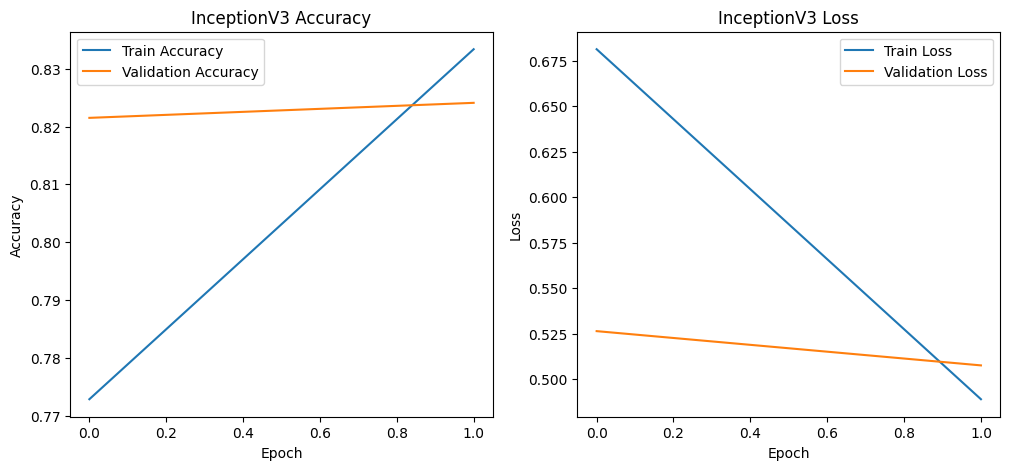

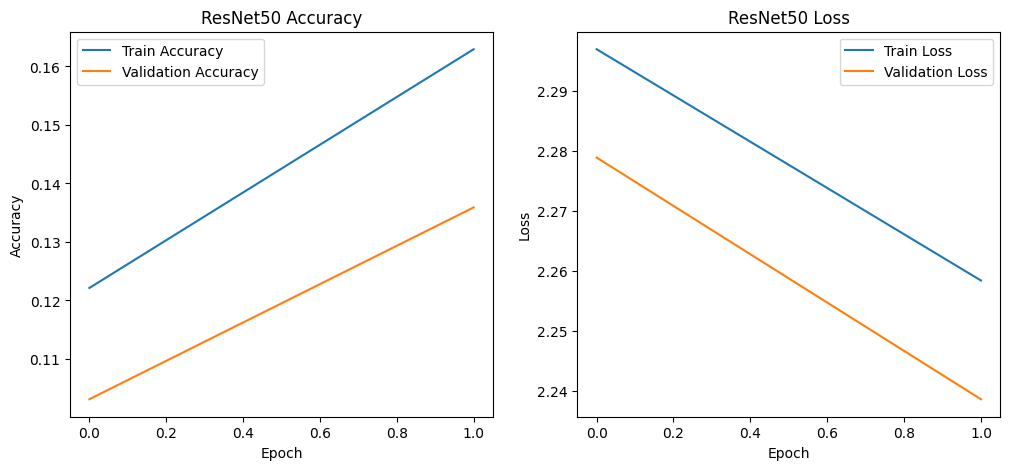

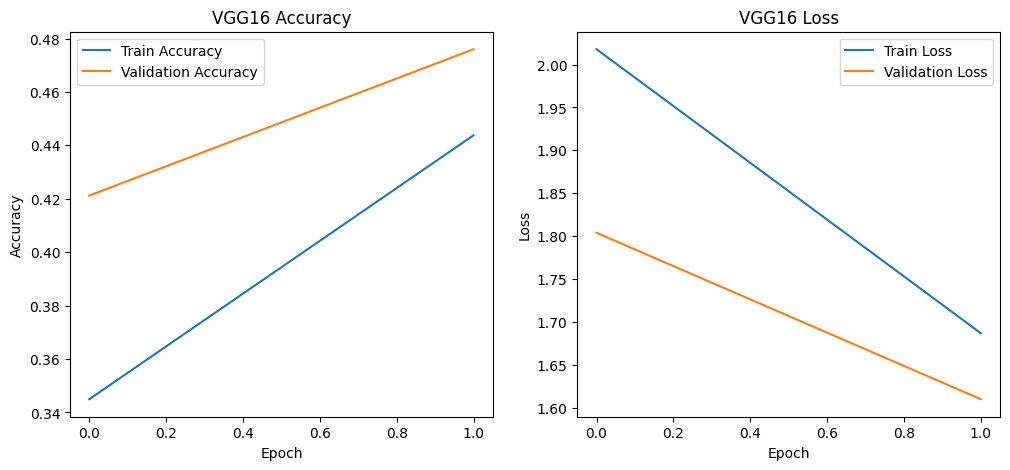

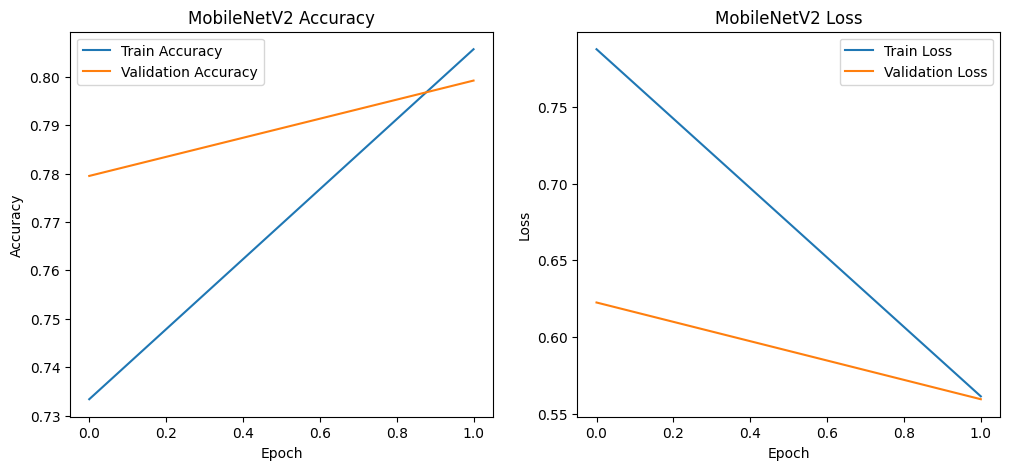

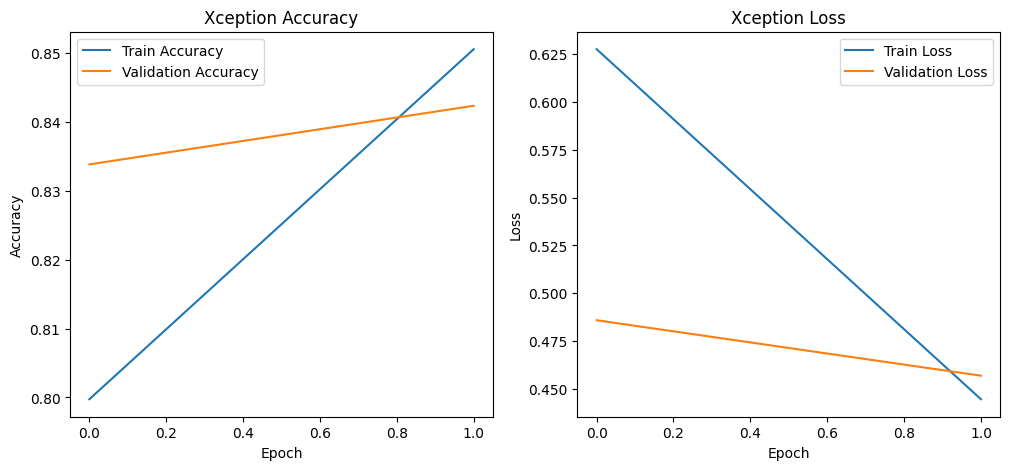

Evaluating InceptionV3...
InceptionV3 - Test Loss: 0.5231, Test Accuracy: 0.8206
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.87      0.95      0.91      1000
           2       0.80      0.79      0.80      1000
           3       0.78      0.61      0.68      1000
           4       0.74      0.83      0.78      1000
           5       0.68      0.86      0.76      1000
           6       0.88      0.82      0.85      1000
           7       0.93      0.76      0.84      1000
           8       0.85      0.89      0.87      1000
           9       0.92      0.84      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

Evaluating ResNet50...
ResNet50 - Test Loss: 2.2400, Test Accuracy: 0.1356
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.11      0.93      0.19      1000
           1       0.35      0.25      0.29      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.31      0.17      0.22      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.14     10000
   macro avg       0.08      0.14      0.07     10000
weighted avg       0.08      0.14      0.07     10000

Evaluating VGG16...
VGG16 - Test Loss: 1.6092, Test Accuracy: 0.4659
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 186ms/step
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      1000
           1       

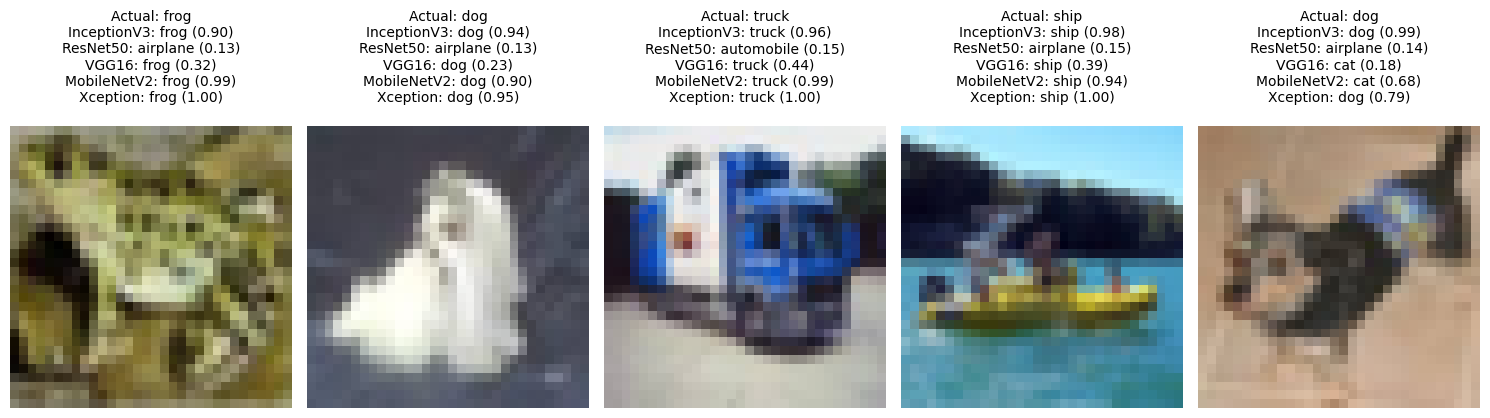

In [24]:
# Plot training history
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

for name, history in history_dict.items():
    plot_history(history, name)

# Evaluate and generate classification reports
for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) # Added verbose=0 to reduce output
    print(f"{name} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))

# Predict and visualize results
sample_indices = np.random.choice(len(x_test), 5, replace=False)
sample_images = x_test[sample_indices]
sample_labels = np.argmax(y_test[sample_indices], axis=1)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'] # Added class names for better labels

plt.figure(figsize=(15, 3 * len(trained_models))) # Adjusted figure size for multiple model predictions
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
    title = f"Actual: {class_names[sample_labels[i]]}\n"
    for j, (name, model) in enumerate(trained_models.items()):
        pred_probs = model.predict(sample_images[i:i+1], verbose=0) # Added verbose=0
        predicted_class = np.argmax(pred_probs)
        title += f"{name}: {class_names[predicted_class]} ({pred_probs[0][predicted_class]:.2f})\n"
    plt.title(title, fontsize=10)
plt.tight_layout()
plt.show()